In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from helpers import colorize

## I. Load data

In [5]:
data_folder = Path('./data')

TM_pix = np.load(data_folder/'TM_pix.npz')['TM']

# set to 0 values below 1e-3 of the maximum value
max_TM = np.max(np.abs(TM_pix))
TM_pix[np.abs(TM_pix)<1e-3*max_TM] = 0
TM_pix/=np.linalg.norm(TM_pix)

# this indicates the number of input and output polarizations
pola_inout = (1,2)
# number of input and output pixels
N2_out, N2_in = TM_pix.shape
N2_out = N2_out//2
N_in = int(np.sqrt(N2_in))
N_out = int(np.sqrt(N2_out))


## II. SVD

In [6]:
U, s, Vh = np.linalg.svd(TM_pix, full_matrices=False)

### II.1 Distribution

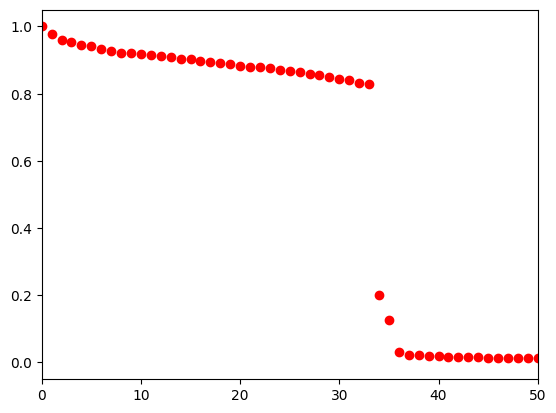

In [13]:
s = s/s[0]
plt.figure()
plt.plot(s, 'ro')
plt.xlim(0, 50)
plt.show()

s_new = s.copy()
s_new[34:] = 0



### II.2 Singilar vectors

**Input channels**

In [19]:
grid = [6,6]

toimg = lambda x: colorize(x, theme='white')

plt.figure(figsize=(10,10))
for i in range(np.prod(grid)):
    plt.subplot(grid[0], grid[1], i+1)
    plt.imshow(toimg(Vh[i,:].reshape([N_in]*2)))
    plt.axis('off')
    plt.title(f'#{i}')
plt.suptitle('Input channels')

plt.show()

(1024, 1024)

**Output channels**

Text(0.5, 0.98, 'Input channels')

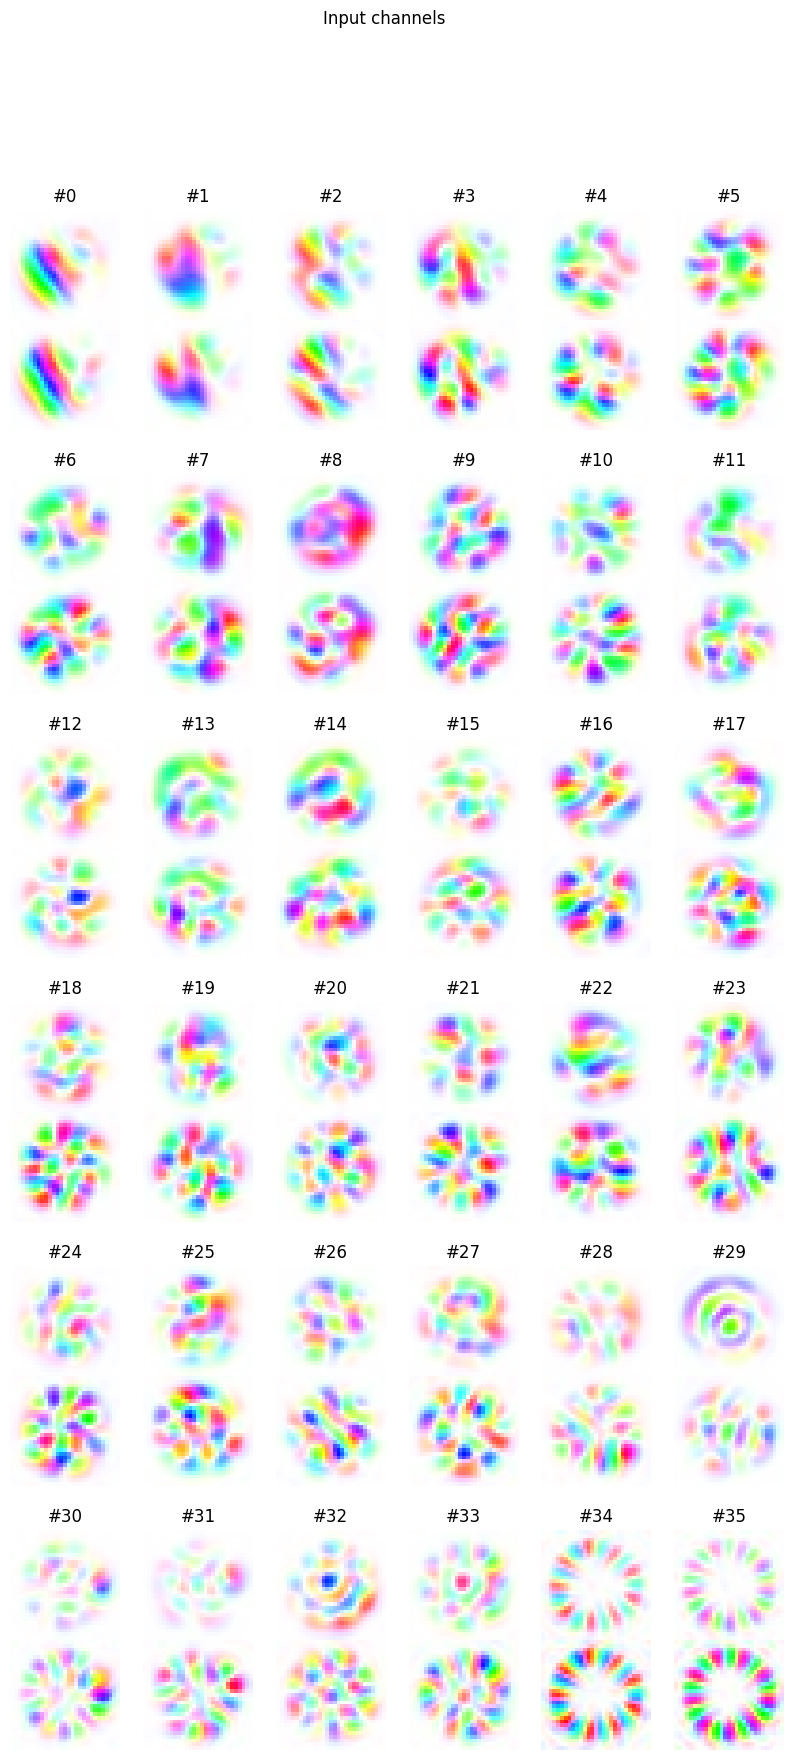

In [42]:
plt.figure(figsize=(10,20))
for i in range(np.prod(grid)):
    plt.subplot(grid[0], grid[1], i+1)
    plt.imshow(toimg(U[:,i].reshape([2*N_out, N_out])))
    plt.axis('off')
    plt.title(f'#{i}')
plt.suptitle('Input channels')

## III. TM in the mode basis
After aberration corrections as done in [10.1103/PhysRevX.11.021060](https://doi.org/10.1103/PhysRevX.11.021060)


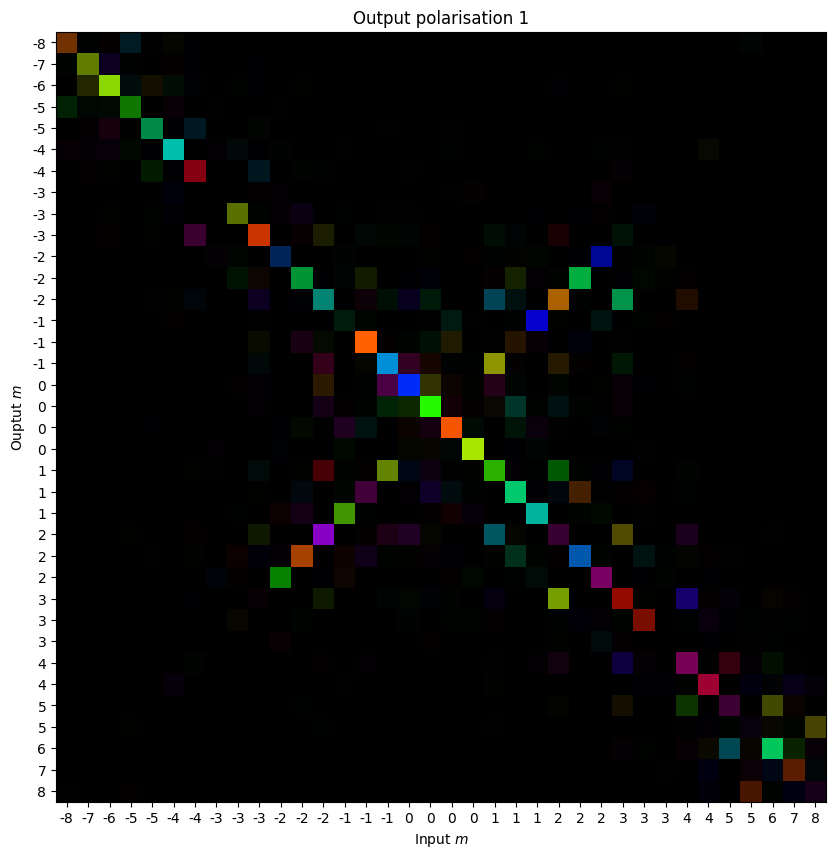

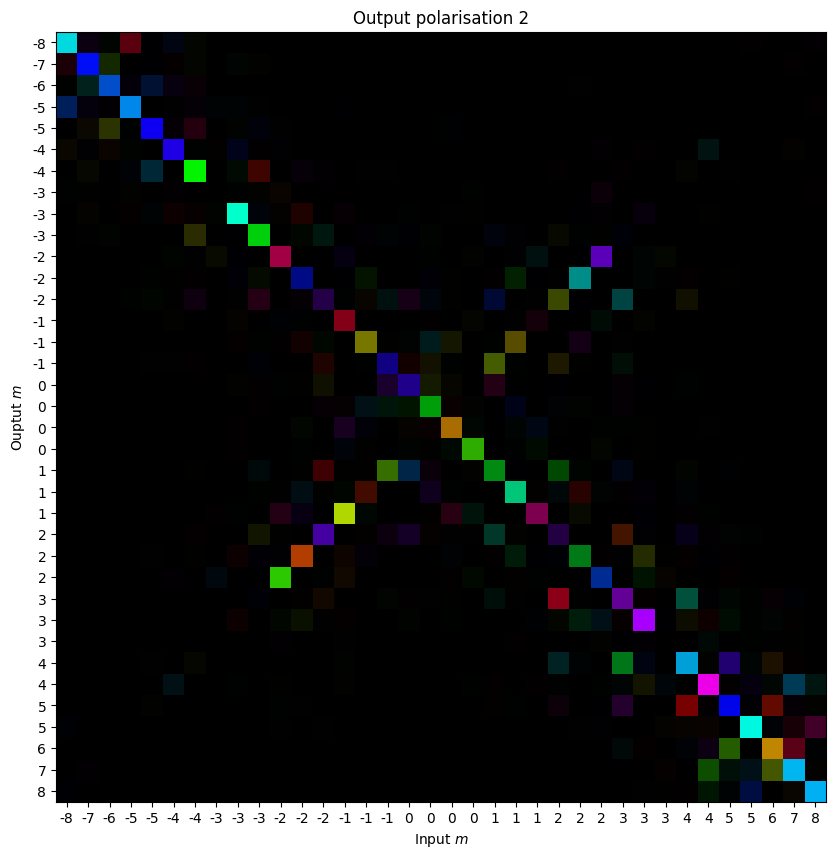

In [74]:
data = np.load(data_folder/'TM_modes_after_corr.npz')
TM_modes = data['TM_modes']
m = data['m']
l = data['l']
near_degenerate_mask = data['near_degenerate_mask'].astype(bool)
n_modes = TM_modes.shape[1]

TM_pola1 = TM_modes[:n_modes,:]
TM_pola2 = TM_modes[n_modes:,:]

toimg = lambda x: colorize(x, theme='dark')

plt.figure(figsize=(10,10))
plt.imshow(toimg(TM_pola1))
step = 1
ind_modes = np.arange(0, n_modes, step)
x_ticks = np.arange(0, n_modes, step)
x_labels = [f'{m[i]:d}' for i in ind_modes]
plt.xticks(x_ticks, x_labels)
plt.yticks(x_ticks, x_labels)
plt.title('Output polarisation 1')
plt.xlabel('Input $m$')
plt.ylabel('Ouptut $m$')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(toimg(TM_pola2))
step = 1
ind_modes = np.arange(0, n_modes, step)
x_ticks = np.arange(0, n_modes, step)
x_labels = [f'{m[i]:d}' for i in ind_modes]
plt.xticks(x_ticks, x_labels)
plt.yticks(x_ticks, x_labels)
plt.title('Output polarisation 2')
plt.xlabel('Input $m$')
plt.ylabel('Ouptut $m$')
plt.show()





Note the order of the modes, we do not sort them by their propagation constant, but by their OAM number $m$.
For comparison, here is what the TM would look like if we have homnogeneous coupling **only** between pairs of modes within the same groups of quasi-degenerate modes. 

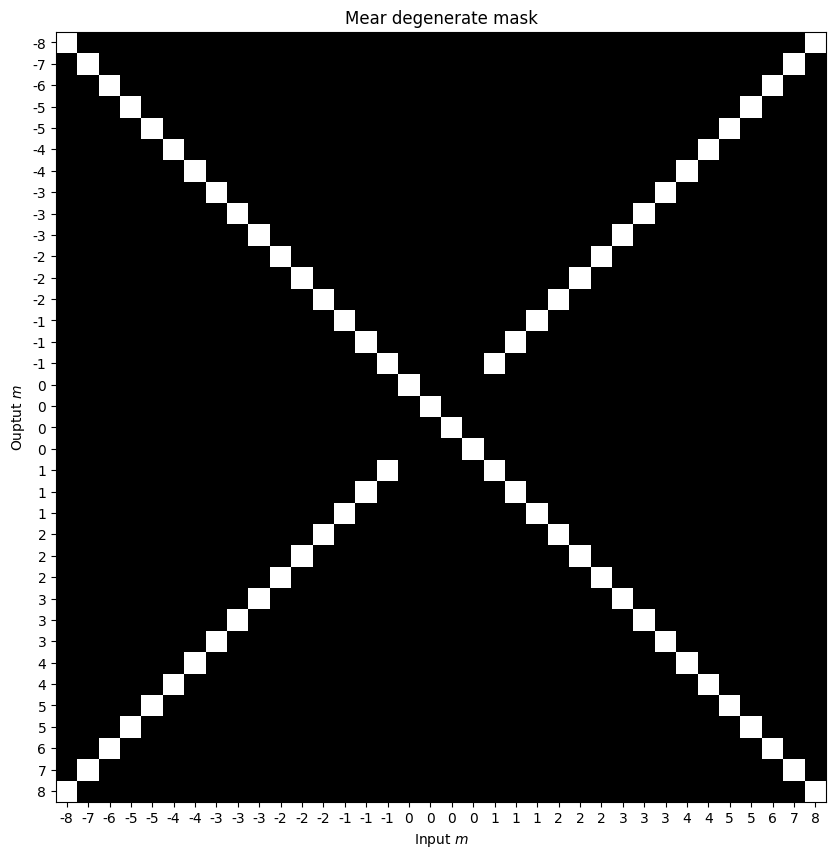

In [76]:
plt.figure(figsize=(10,10))
plt.imshow(near_degenerate_mask, cmap='gray')
step = 1
ind_modes = np.arange(0, n_modes, step)
x_ticks = np.arange(0, n_modes, step)
x_labels = [f'{m[i]:d}' for i in ind_modes]
plt.xticks(x_ticks, x_labels)
plt.yticks(x_ticks, x_labels)
plt.title('Mear degenerate mask')
plt.xlabel('Input $m$')
plt.ylabel('Ouptut $m$')
plt.show()